In [1]:
import pandas as pd

In [84]:
# import the csv file
df=pd.read_csv('project1_data.csv')

In [85]:
df.head() # check whether there's header in the dataframe

,age,job,marital,education,balance,housing,loan,y
0,58,management,married,tertiary,2143,yes,no,no
1,44,technician,single,secondary,29,yes,no,no
2,33,entrepreneur,married,secondary,2,yes,yes,no
3,47,blue-collar,married,unknown,1506,yes,no,no
4,33,unknown,single,unknown,1,no,no,no


In [86]:
# looping through the columns to fill the entries with NaN values with ""
for col in df.columns:
    df[col]=df[col].fillna("NA")

In [87]:
# Look into the statistics info in categories by variables for nulls and error data check after NaN fill
for col in df.columns:
    print(df[col].value_counts())

32    2084
31    1995
33    1971
34    1924
35    1886
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 78, dtype: int64
blue-collar      9674
management       9380
technician       7551
admin.           5135
services         4125
retired          2245
self-employed    1566
entrepreneur     1480
unemployed       1293
housemaid        1235
student           933
NA                311
unknown           283
Name: job, dtype: int64
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
 0        3513
 1         195
 2         155
 4         139
 3         134
          ... 
-381         1
 4617        1
 20584       1
 4358        1
 16353       1
Name: balance, Length: 7168, dtype: int64
yes    25130
no     20081
Name: housing, dtype: int64
no     37967
yes     7244
Name: loan, dtype: int64
no     39909
yes     5288
NA     

After review the categories distribution by variables, marital, education, housing, loan
variables are very clean and prepared well for further model building and analysis. There are 311 NA observations in "job" variable and 14 NA in output "y". I still need to look into age and balance further, and fix the NAs in "job"and y columns later.

In [88]:
# Check the NaNs in "age" & "balance"
print("How many NaN in 'age':",sum(df['age'].isna()==True))
print("How many NaN in 'balance':",sum(df['balance'].isna()==True))

How many NaN in 'age': 0
How many NaN in 'balance': 0


Based on the result, column"age" and "balance" have no NaNs data. Therefore, no further null clear operation is needed for those two columns.

In [89]:
# Fix the nulls in "job" and y columns
# For job, I will convert the NaN values to "Unknown" category
df['job']=df['job'].replace("NA","unknown")

In [90]:
# For y, I will delete the 14 observations
df=df[df.y!='NA']

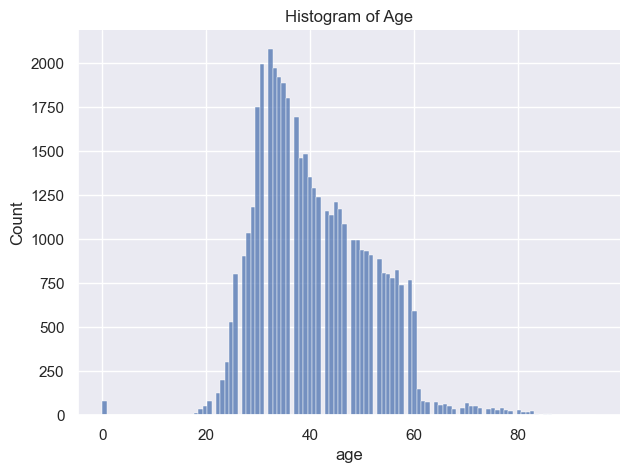

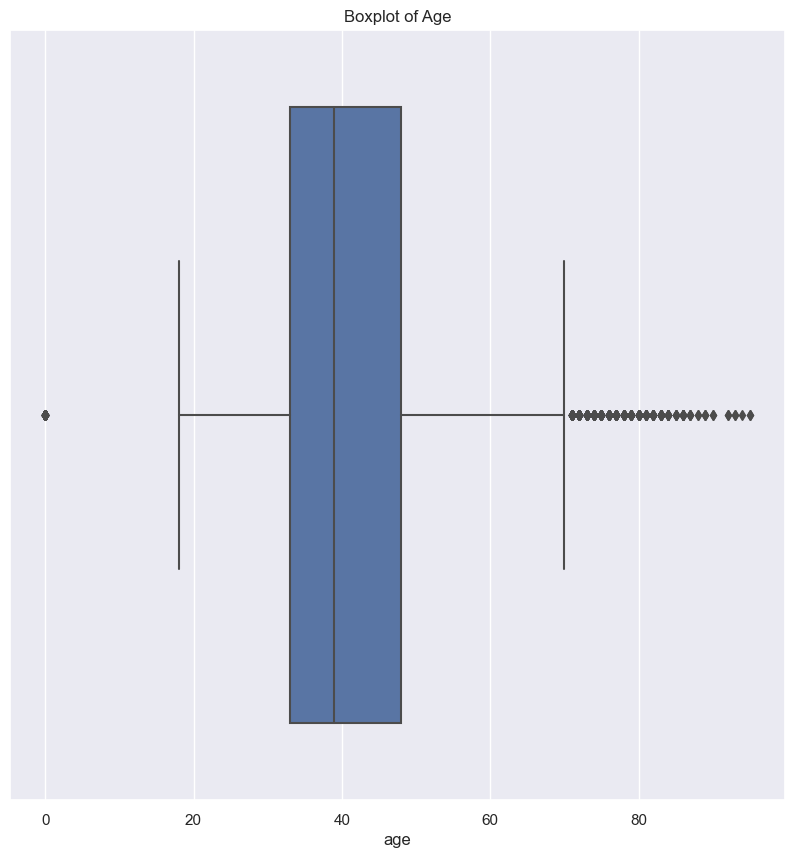

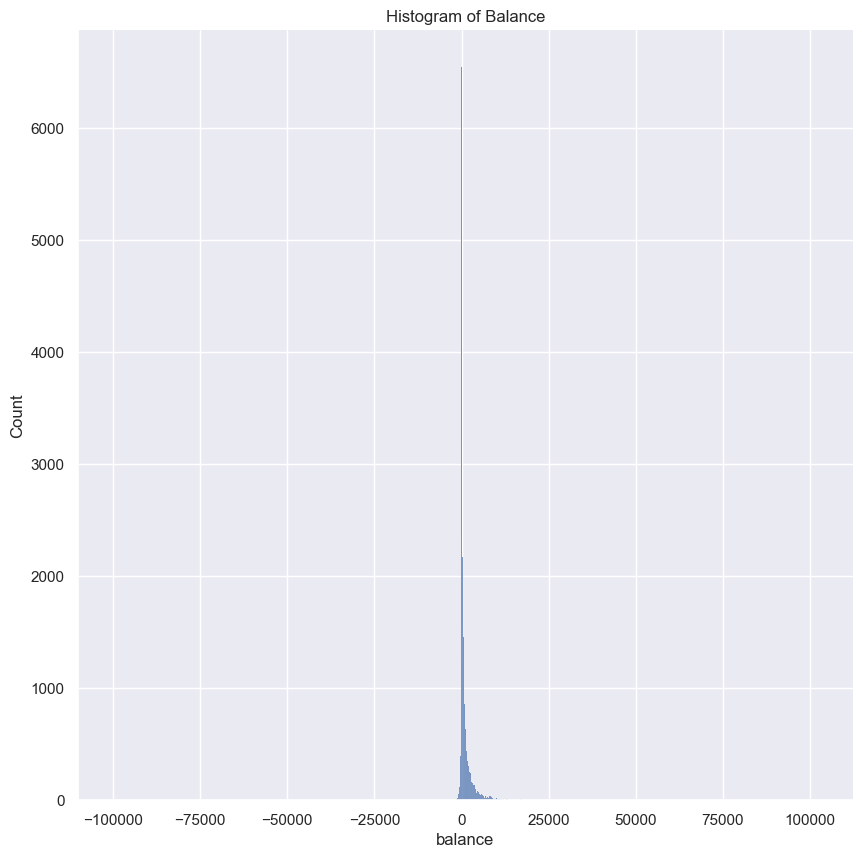

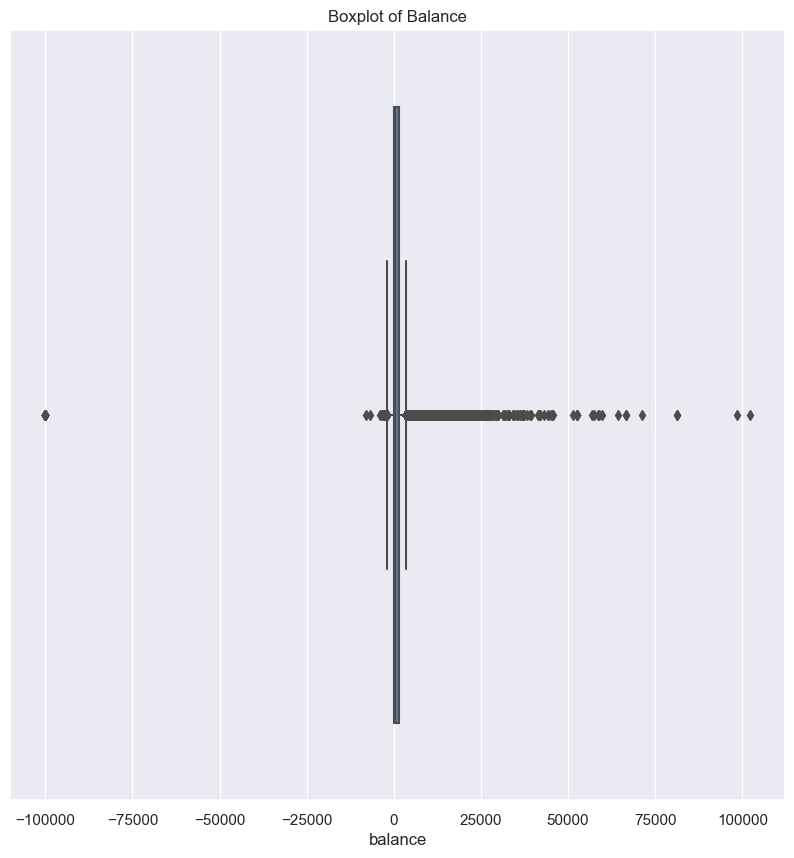

In [91]:
# Check age and balance distribution
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")
f,ax=plt.subplots(figsize=(7,5))
sns.despine(f)
sns.histplot(data=df,x="age").set(title='Histogram of Age')
plt.show()
sns.set_theme(style="darkgrid")
sns.boxplot(data=df,x="age").set(title='Boxplot of Age')
plt.show()
sns.set_theme(style="darkgrid")
f,ax=plt.subplots()
sns.despine(f)
sns.histplot(data=df,x="balance").set(title='Histogram of Balance')
plt.show()
sns.set_theme(style="darkgrid")
sns.boxplot(data=df,x="balance").set(title='Boxplot of Balance')
plt.show()

From age side, we find out the obervations in the age range from 0 to 100. The age between 0-18 and the ages between 68-100 are outliers. It's reasonable the ages of some participants are between 68 and 100, but the age zero baby can't answer the call and pariticipate the survey. We can treat "age=0" observations as error data to be deleted.

From the Histogram and Boxplot of observations on balance, almost balance of participants are zero, few of them are even in very huge negative balance amount, around -100,000. From my perspective, the observations on balance may be incompleted and inaccurate. I will try to compare the accuracies of the models based on logistics regression by including balance as variable and excluding balance as variable to figure out whether we need keep "balance" as varible in the model.

In [92]:
# Check the # of age=0 and delete the observations as age=0
print("How many 0 in 'age':",sum(df['age']==0))
#Delete the rows for age=0
df=df[df.age!=0]

How many 0 in 'age': 81


In [93]:
# Clarify "unknown" in job and marital features in category
df['job']=df['job'].replace("unknown","jobunknown")

In [94]:
df['education']=df['education'].replace("unknown","eduunknown")

In [95]:
# Encode the categorical feature variables
job=pd.get_dummies(df['job'],drop_first=True)

In [96]:
marital=pd.get_dummies(df['marital'],drop_first=True)

In [97]:
education=pd.get_dummies(df['education'],drop_first=True)

In [98]:
from sklearn import preprocessing
df["housing"]=preprocessing.LabelEncoder().fit_transform(df["housing"])

In [99]:
df["loan"]=preprocessing.LabelEncoder().fit_transform(df["loan"])

In [100]:
#drop columns not needed to be replaced w dummies
df.drop(['job','marital','education'],axis=1, inplace=True)

In [101]:
# Encode the target column (y) as 0(no) and 1(yes)
df["y"]=preprocessing.LabelEncoder().fit_transform(df["y"])

In [102]:
# Concatenate new columns w dummy variables to df
df=pd.concat([df,job,marital,education], axis=1)

In [103]:
# Check the distributions of data again after NA and error data cleared
# Calculate the Prevalence of the variables and target
for col in df.columns:
    print(df[col].value_counts())

32    2083
31    1994
33    1970
34    1924
35    1885
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 77, dtype: int64
 0        3505
 1         195
 2         155
 4         139
 3         134
          ... 
 4358        1
 5317        1
-697         1
 3936        1
 16353       1
Name: balance, Length: 7164, dtype: int64
1    25076
0    20040
Name: housing, dtype: int64
0    37886
1     7230
Name: loan, dtype: int64
0    39839
1     5277
Name: y, dtype: int64
0    35462
1     9654
Name: blue-collar, dtype: int64
0    43640
1     1476
Name: entrepreneur, dtype: int64
0    43885
1     1231
Name: housemaid, dtype: int64
0    44523
1      593
Name: jobunknown, dtype: int64
0    35751
1     9365
Name: management, dtype: int64
0    42875
1     2241
Name: retired, dtype: int64
0    43554
1     1562
Name: self-employed, dtype: int64
0    41001
1     4115
Name: services, dtype: int64
0    44186
1      930
Name: student, dtype: int64
0    37578
1     7538

In [104]:
df.describe(include='all')

,age,balance,housing,loan,y,blue-collar,entrepreneur,housemaid,jobunknown,management,...,self-employed,services,student,technician,unemployed,married,single,primary,secondary,tertiary
count,45116.000000,45116.000000,45116.000000,45116.000000,45116.000000,45116.000000,45116.000000,45116.000000,45116.000000,45116.000000,...,45116.000000,45116.000000,45116.000000,45116.000000,45116.000000,45116.000000,45116.000000,45116.000000,45116.000000,45116.000000
mean,40.938137,1310.821039,0.555812,0.160254,0.116965,0.213982,0.032716,0.027285,0.013144,0.207576,...,0.034622,0.091209,0.020614,0.167080,0.028615,0.601937,0.282826,0.151498,0.513210,0.294197
std,10.620132,3806.377071,0.496881,0.366845,0.321382,0.410119,0.177893,0.162915,0.113892,0.405576,...,0.182822,0.287910,0.142088,0.373052,0.166724,0.489504,0.450378,0.358538,0.499831,0.455686
min,18.000000,-99999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,448.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,48.000000,1428.250000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,95.000000,102127.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The cleaned data looks good and be well prepared. I feel all the seven variables (age, job, marital, education, balance,housing, and loan) may have impact on whether the client subscribe a term deposit or not. I will include all of them to build the modele1, and then build another model excluding "balance" as I mentioned before. I will go to next step then.

In [105]:
# Split data into a train (80%) and test set (20%)
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)

In [110]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
#Prepare data
train_y=train['y']
train_x=train.drop(['y'],axis=1)
test_y=test['y']
test_x=test.drop(['y'],axis=1)
#fitting the model. Due to amounts of "No" is much larger than "yes" in y as target output, I utilize class weight parameter. 
model1= LogisticRegression(random_state=10,class_weight='balanced').fit(train_x, train_y)

In [111]:
prediction1=model1.predict(test_x)

In [112]:
print("Coeffients are in model 1:",model1.coef_)

Coeffients are in model 1: [[ 5.17242118e-03  3.17255918e-05 -7.00659220e-01 -5.82582660e-01
  -2.68444576e-01 -1.49522345e-01 -1.59667623e-01 -3.02244023e-02
  -5.39838387e-02  4.07389203e-01 -3.43744487e-02 -1.71099518e-01
   3.13083427e-01 -1.29330756e-01  9.44624853e-02 -8.95909611e-02
   2.81741061e-01 -2.82142026e-01  5.69531486e-02  2.81469810e-01]]


In [113]:
# Checking prevision for model 1
from sklearn.metrics import classification_report
print(classification_report(test_y,prediction1))

              precision    recall  f1-score   support

           0       0.93      0.60      0.73      7987
           1       0.18      0.66      0.28      1037

    accuracy                           0.61      9024
   macro avg       0.55      0.63      0.51      9024
weighted avg       0.85      0.61      0.68      9024



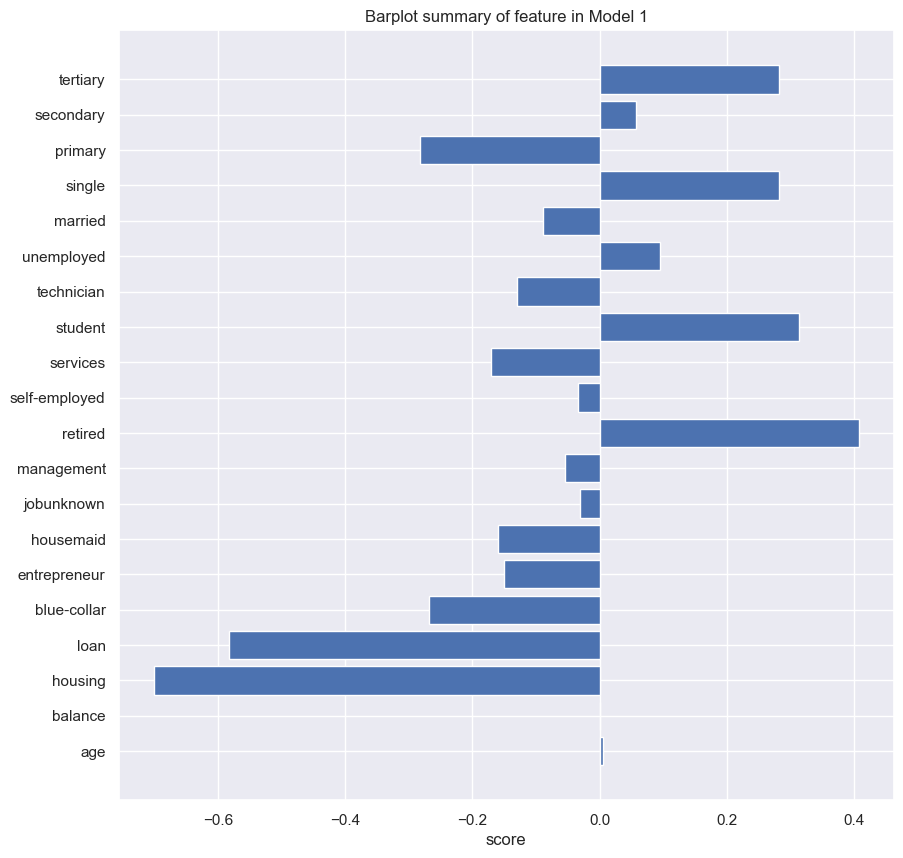

In [114]:
#getting feature importance
importance1=model1.coef_.flatten()
#barplot of features
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=(10,10)
plt.barh(test_x.columns,importance1)
plt.title("Barplot summary of feature in Model 1")
plt.xlabel("score")
plt.show()

Scores marked with a zero coefficient, or very near zero coefficient, indicate that the model found those features unimportant and essentially removed them from the model. Positive scores indicate a feature that predicts class 1 (“yes”). Negative scores indicate a feature that predicts class 2 (“no”).

From the Barplot summary above from Model 1, features age, balance, jobunknown can be marked as unimportant by the model.

I will drop those two features/ columns from Model 1 and create a new model, Model 2 by simplifying and extracting the useful features from Model 1.

In [115]:
test_x2=test_x.drop(['age','balance','jobunknown'],axis=1)
train_x2=train_x.drop(['age','balance','jobunknown'],axis=1)
model2= LogisticRegression(random_state=10,class_weight='balanced').fit(train_x2, train_y)
prediction2=model2.predict(test_x2)
print("Coeffients are in model 2:",model2.coef_)

Coeffients are in model 2: [[-0.68758316 -0.53965634 -0.35580797 -0.44804712 -0.45192473 -0.17645122
   0.60969649 -0.20326568 -0.28362839  0.43399837 -0.19502488  0.06770569
  -0.1769591   0.16708837 -0.27423439 -0.06575275  0.22926905]]


In [116]:
# Checking prevision for model 2
from sklearn.metrics import classification_report
print(classification_report(test_y,prediction2))

              precision    recall  f1-score   support

           0       0.93      0.62      0.74      7987
           1       0.18      0.64      0.28      1037

    accuracy                           0.62      9024
   macro avg       0.55      0.63      0.51      9024
weighted avg       0.84      0.62      0.69      9024



Based on the result above, the accuracy of logistic regression classifier on test set is: 0.93 (93%)

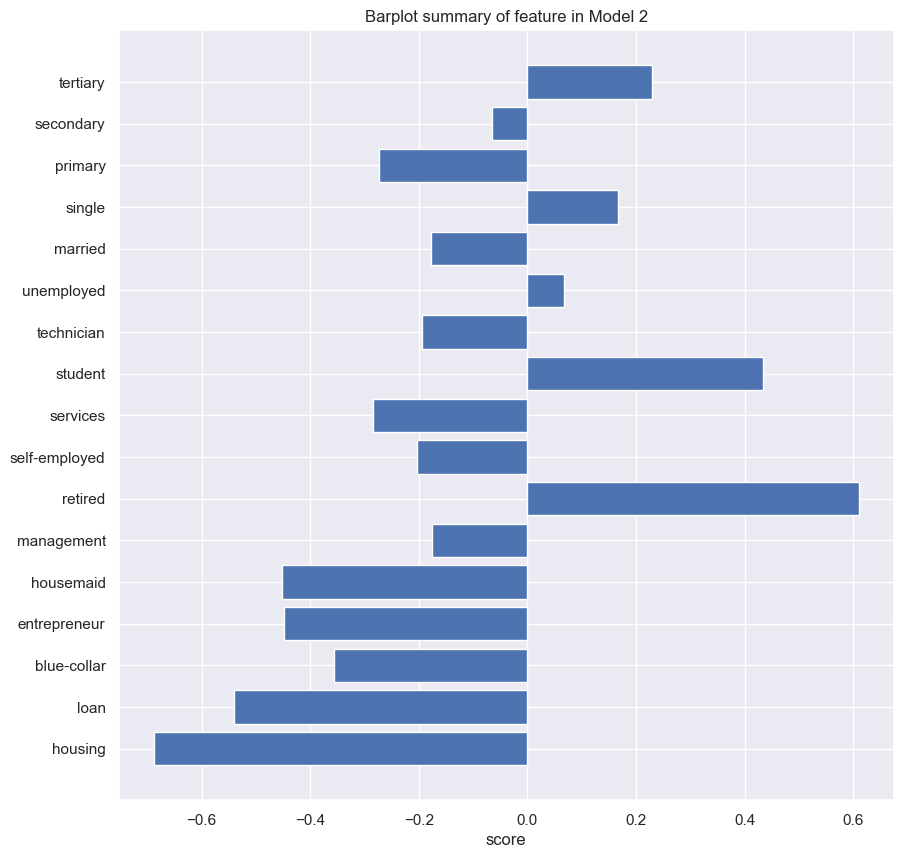

In [117]:
#getting feature importance
importance2=model2.coef_.flatten()
#barplot of features
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=(10,10)
plt.barh(test_x2.columns,importance2)
plt.title("Barplot summary of feature in Model 2")
plt.xlabel("score")
plt.show()

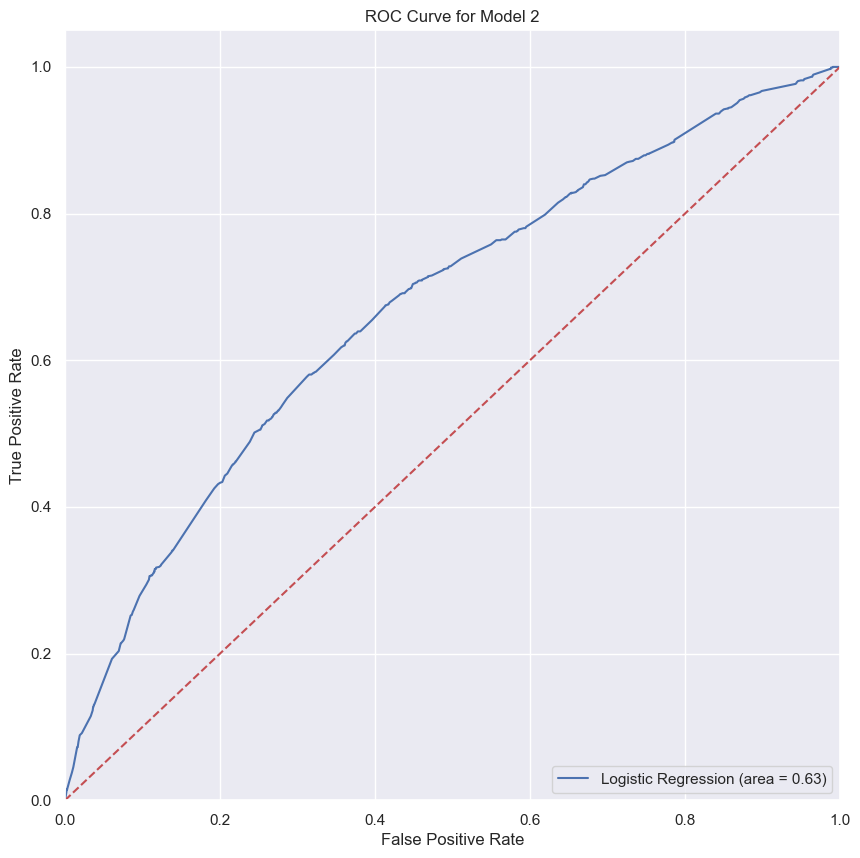

In [118]:
# Create ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
roc_auc1=roc_auc_score(test_y,model2.predict(test_x2))
fpr, tpr, thresholds = roc_curve(test_y, model2.predict_proba(test_x2)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc1)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Model 2')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

The receiver operating characteristic (ROC) curve is a common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner). In this case, the AUC area is 0.63.

In [137]:
# Confusion matrix of model 2 with decision threshold of 0.7
from sklearn import metrics
confusion_matrix=metrics.confusion_matrix(test_y, pd.Series([1 if y > 0.7 else 0 for y in model2.predict_proba(test_x2)[:,1]]))
print(confusion_matrix)

[[7690  297]
 [ 903  134]]


In [138]:
#print accuracy of model2 with decision threshold of 0.7
print("Accuracy of model2 is:",metrics.accuracy_score(test_y, [1 if y > 0.7 else 0 for y in model2.predict_proba(test_x2)[:,1]]))
#print precision value of model
print("Precision value of model2 is:",metrics.precision_score(test_y, [1 if y > 0.7 else 0 for y in model2.predict_proba(test_x2)[:,1]]))
#print recall value of model
print("Recall value of model2 is:",metrics.recall_score(test_y, [1 if y > 0.7 else 0 for y in model2.predict_proba(test_x2)[:,1]]))

Accuracy of model2 is: 0.8670212765957447
Precision value of model2 is: 0.3109048723897912
Recall value of model2 is: 0.12921890067502412


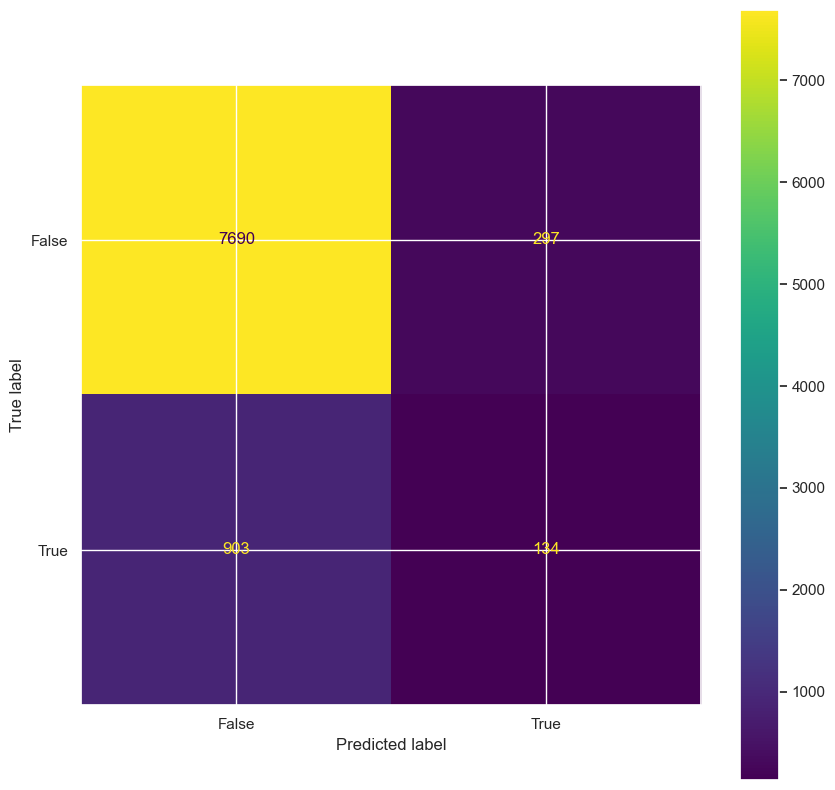

In [139]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

Based on Confusion Matrix, percentage of correct predictions is 86.7%; Correct positive predictions relative to total positive predictions is 31%; Correct positive predictions relative to total actual positives is 12.92%.
We have 7824 (7690+134) correct predictions and 1200 (297+903) incorrect predictions in total.

# Short Summary:

In the logistic regression models I built, I will choose model2 as the final logistic regression model, because the accuracy of model 2 keep same after I dropped some unimportant features from model 1. It makes Model 2 is clearer and simpler. People is also easier to figure out which features impact more on whether people would subscribe a term deposit or not.

From the Barplot summary of feature in Model 2, we can find out some interesting points. Job status has big impact on the prediction. Students and retired people are more likely to subsribe term deposits more than other jobs. The people who has personal loan and housing loan are in less probability to have term deposits. Singles have more possibility to have term deposit than couples. The people with higher education levels has more possibility to have term deposits.

Although the result of the logistic regression model shows a lot insights about which features are the most important factors to predict whether the people have a term deposit or not, the quality of the model may be not good enough to predict whether the target person has a deposit term or not, especially in real business world. 

Logistic regression returns a probability by 0 and 1. By default, the probability threshold in Logitstic regression is usully 0.5 in ROC Curve. Therefore, in this case of predicting whether the potential customers would subscribe a term deposit or not, from AUC perspective, if the answer we get from the input of features (job, marital, education etc. features converted into numbers or binary) is 0.63, larger than 0.5, then we can consider that the customer with 63% predicted chance of subscribing a term deposit. It's obsolutely not good enough in real business world.It's not much better than random chance.

Based on confusion matrix measurement method, the accuracy of the model has 86.7%. The accuracy rate looks good, but we need consider more on precision and recall rates while the distribution of target variable is skewed (39,839=88% No vs 5277=12% Yes). In this case, prediction and recall rates are both very low. 

There's limited way to improve the model quality based on the current features we have and the logistic regression method I am utilizing. If more features can be collected and added in the model building, it may help improve the quality of the model. From another side, more classification methods can be tried, Decision Tree, Random Forest, k-means, Gradient Boost and more ensembles added etc. By comparing various classification methods, the model which is more fittable than this logistic regression model may occur.